In [735]:
# Datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
 


 
df1 = pd.read_csv('test.csv')
df2 = pd.read_csv('train.csv')

dataset = pd.concat([df1, df2], ignore_index=True)
dataset.to_csv('combined_dataset.csv', index=False)




# Tipet e të dhënave

In [736]:
print(dataset.dtypes)

brand                           object
model                           object
year                           float64
mileage                        float64
engine                          object
engine_size                    float64
transmission                    object
automatic_transmission         float64
fuel_type                       object
drivetrain                      object
min_mpg                        float64
max_mpg                        float64
damaged                        float64
first_owner                    float64
personal_using                 float64
turbo                          float64
alloy_wheels                   float64
adaptive_cruise_control        float64
navigation_system              float64
power_liftgate                 float64
backup_camera                  float64
keyless_start                  float64
remote_start                   float64
sunroof/moonroof               float64
automatic_emergency_braking    float64
stability_control        

# Vlerat null

In [737]:
print(dataset.isnull().sum(axis=0))


brand                             3
model                             3
year                              3
mileage                           3
engine                           54
engine_size                    1534
transmission                    123
automatic_transmission            3
fuel_type                         3
drivetrain                        3
min_mpg                        3752
max_mpg                        3752
damaged                         224
first_owner                     395
personal_using                  246
turbo                             3
alloy_wheels                      3
adaptive_cruise_control           3
navigation_system                 3
power_liftgate                    3
backup_camera                     3
keyless_start                     3
remote_start                      3
sunroof/moonroof                  3
automatic_emergency_braking       3
stability_control                 3
leather_seats                     3
memory_seat                 

# Rreshtat duplikate

In [738]:
dataset.duplicated().sum()

0

# Kolonat që nuk do të përdoren

In [739]:
dataset.drop(columns=['third_row_seating'], inplace=True)

#Kolona me te dhena duplikate jane engine dhe engine_size, e largojme engine pasi na mjafton engine size
dataset.drop(columns=['engine'], inplace=True)

# Pasi per ne informate e vlefshme është ajo se a është vetura automatike apo manuale, e mbajmë vetëm kolonën automatic_transmission 
dataset.drop(columns=['transmission'], inplace=True)


# Pastrimi i të dhënave

In [740]:
# Convert 'price' column from object to numeric
dataset['price'] = pd.to_numeric(dataset['price'], errors='coerce')

# Drop rows with NaN values in the 'year' column
dataset = dataset.dropna(subset=['year'])

# Convert 'year' column from float to integer
dataset['year'] = dataset['year'].astype(int)

# Convert 'year' column from float to integer
dataset['mileage'] = dataset['mileage'].astype(int)

boolean_columns = ['damaged', 'first_owner', 'personal_using', 'turbo', 'alloy_wheels', 
                   'adaptive_cruise_control', 'navigation_system', 'power_liftgate', 
                   'backup_camera', 'keyless_start', 'remote_start', 'sunroof/moonroof', 
                   'automatic_emergency_braking', 'stability_control', 'leather_seats', 
                   'memory_seat' , 'apple_car_play/android_auto', 
                   'bluetooth', 'usb_port', 'heated_seats','automatic_transmission']

# Convert boolean columns to boolean data type
dataset[boolean_columns] = dataset[boolean_columns].astype(bool)


In [741]:
# Count the number of unique interior colors
unique_interior_colors = dataset['interior_color'].nunique()

# Count the number of unique exterior colors
unique_exterior_colors = dataset['exterior_color'].nunique()

# Print the counts
print("Number of unique interior colors:", unique_interior_colors)
print("Number of unique exterior colors:", unique_exterior_colors)


Number of unique interior colors: 1053
Number of unique exterior colors: 2135


In [742]:
# Count the occurrences of each unique color in 'interior_color' column
interior_color_counts = dataset['interior_color'].value_counts()

# Count the occurrences of each unique color in 'exterior_color' column
exterior_color_counts = dataset['exterior_color'].value_counts()

# Display the counts for interior colors
print("Interior Color Counts:")
print(interior_color_counts)

# Display the counts for exterior colors
print("Exterior Color Counts:")
print(exterior_color_counts)

#pd.set_option('display.max_rows', None)


Interior Color Counts:
Black                                                       9258
Gray                                                        1175
Ebony                                                        851
Charcoal                                                     818
Jet Black                                                    775
Carbon Black                                                 499
Titan Black                                                  479
Beige                                                        478
Nero                                                         408
Tan                                                          296
Ebony / Ebony                                                294
Red                                                          284
Brown                                                        190
Global Black                                                 178
Graphite                                                     139
Bl

In [743]:
# Count the occurrences of each unique interior color
interior_color_counts = dataset['interior_color'].value_counts()

# Count the occurrences of each unique exterior color
exterior_color_counts = dataset['exterior_color'].value_counts()

# Identify exterior colors with a frequency of less than 100 
less_frequent_colors_exterior = exterior_color_counts[exterior_color_counts < 100].index

# Identify interior colors with a frequency of less than 100
less_frequent_colors_interior = interior_color_counts[interior_color_counts < 100].index

 
# Create a new category for less frequent colors
dataset['interior_color'] = dataset['interior_color'].replace(less_frequent_colors_interior, 'Other')
dataset['exterior_color'] = dataset['exterior_color'].replace(less_frequent_colors_exterior, 'Other')


In [744]:
# Display the counts for interior colors
print("Interior Color Counts:")
print(interior_color_counts)

# Display the counts for exterior colors
print("Exterior Color Counts:")
print(exterior_color_counts)

Interior Color Counts:
Black                                                       9258
Gray                                                        1175
Ebony                                                        851
Charcoal                                                     818
Jet Black                                                    775
Carbon Black                                                 499
Titan Black                                                  479
Beige                                                        478
Nero                                                         408
Tan                                                          296
Ebony / Ebony                                                294
Red                                                          284
Brown                                                        190
Global Black                                                 178
Graphite                                                     139
Bl

In [745]:
print(dataset.isnull().sum(axis=0))


brand                             0
model                             0
year                              0
mileage                           0
engine_size                    1531
automatic_transmission            0
fuel_type                         0
drivetrain                        0
min_mpg                        3752
max_mpg                        3752
damaged                           0
first_owner                       0
personal_using                    0
turbo                             0
alloy_wheels                      0
adaptive_cruise_control           0
navigation_system                 0
power_liftgate                    0
backup_camera                     0
keyless_start                     0
remote_start                      0
sunroof/moonroof                  0
automatic_emergency_braking       0
stability_control                 0
leather_seats                     0
memory_seat                       0
apple_car_play/android_auto       0
bluetooth                   

In [746]:
# Largimi i rreshtave qe posedojnë vlera null

dataset = dataset.dropna(subset=['price'])
dataset = dataset.dropna(subset=['exterior_color'])
dataset = dataset.dropna(subset=['interior_color'])
dataset = dataset.dropna(subset=['engine_size'])

In [747]:
print(dataset.isnull().sum(axis=0))

brand                             0
model                             0
year                              0
mileage                           0
engine_size                       0
automatic_transmission            0
fuel_type                         0
drivetrain                        0
min_mpg                        3118
max_mpg                        3118
damaged                           0
first_owner                       0
personal_using                    0
turbo                             0
alloy_wheels                      0
adaptive_cruise_control           0
navigation_system                 0
power_liftgate                    0
backup_camera                     0
keyless_start                     0
remote_start                      0
sunroof/moonroof                  0
automatic_emergency_braking       0
stability_control                 0
leather_seats                     0
memory_seat                       0
apple_car_play/android_auto       0
bluetooth                   

In [748]:
columns_of_interest = ['min_mpg', 'max_mpg']

# Create a new DataFrame with only the selected columns
selected_data = dataset[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Print the correlation matrix
print(correlation_matrix)

         min_mpg  max_mpg
min_mpg  1.00000  0.92166
max_mpg  0.92166  1.00000


In [749]:
dataset.drop(['min_mpg', 'max_mpg' ], axis=1, inplace=True)
 

# Të dhënat e plota

In [750]:
print(dataset.isnull().sum(axis=0))
# Get the shape of the DataFrame
num_rows, num_columns = dataset.shape

# Print the number of columns
print("Number of columns:", num_columns)
print("Number of rows:", num_rows)



brand                          0
model                          0
year                           0
mileage                        0
engine_size                    0
automatic_transmission         0
fuel_type                      0
drivetrain                     0
damaged                        0
first_owner                    0
personal_using                 0
turbo                          0
alloy_wheels                   0
adaptive_cruise_control        0
navigation_system              0
power_liftgate                 0
backup_camera                  0
keyless_start                  0
remote_start                   0
sunroof/moonroof               0
automatic_emergency_braking    0
stability_control              0
leather_seats                  0
memory_seat                    0
apple_car_play/android_auto    0
bluetooth                      0
usb_port                       0
heated_seats                   0
interior_color                 0
exterior_color                 0
price     

# Diskretizimi

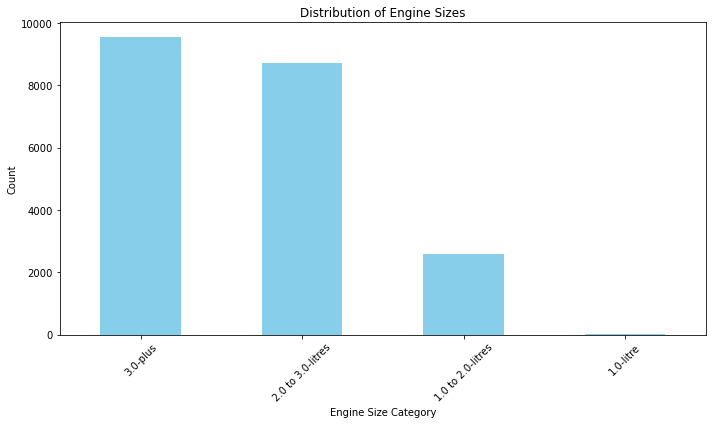

In [751]:
# Define the bins for categorization
bins = [0, 1.0, 2.0, 3.0, float('inf')]  # The bins represent the upper bounds for each category

# Define the labels for the categories
labels = ['1.0-litre', '1.0 to 2.0-litres', '2.0 to 3.0-litres', '3.0-plus']

# Categorize the 'engine_size' column using cut()
dataset['engine_size_category'] = pd.cut(dataset['engine_size'], bins=bins, labels=labels, right=False)

category_counts = dataset['engine_size_category'].value_counts()
 
# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Engine Sizes')
plt.xlabel('Engine Size Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Drop the old 'engine_size' column
dataset.drop(columns=['engine_size'], inplace=True)
 


In [752]:
# Print all unique values of the 'drivetrain' column
print("Unique values of 'drivetrain' column:")
print(dataset['drivetrain'].unique())

# Count the occurrences of each unique value in the 'drivetrain' column
drivetrain_counts = dataset['drivetrain'].value_counts()

# Print the counts for each unique drivetrain value
print("Drivetrain Counts:")
print(drivetrain_counts)


Unique values of 'drivetrain' column:
['Rear-wheel Drive' 'Four-wheel Drive' 'Front-wheel Drive' 'Unknown' '2WD']
Drivetrain Counts:
Four-wheel Drive     11777
Front-wheel Drive     5683
Rear-wheel Drive      3348
Unknown                 64
2WD                      1
Name: drivetrain, dtype: int64


In [753]:
dataset = dataset[~dataset['drivetrain'].isin(['Unknown', '2WD'])]
 

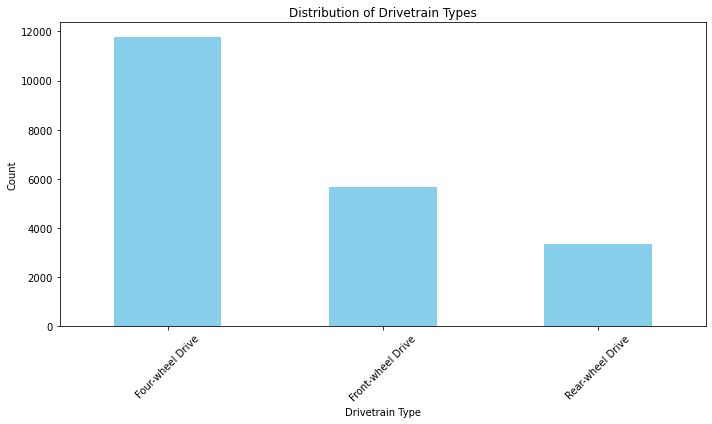

In [754]:
labels = ['Four-wheel Drive', 'Front-wheel Drive', 'Rear-wheel Drive']

# Categorize the 'drivetrain' column using predefined labels
dataset['drivetrain_category'] = pd.Categorical(dataset['drivetrain'], categories=labels)

# Count the occurrences of each category
category_counts = dataset['drivetrain_category'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Drivetrain Types')
plt.xlabel('Drivetrain Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Drop the old 'drivetrain' column
dataset.drop(columns=['drivetrain'], inplace=True)


In [755]:
# Print all unique values of the 'fuel' column
print("Unique values of 'fuel' column:")
print(dataset['fuel_type'].unique())

# Count the occurrences of each unique value in the 'fuel' column
fuel_counts = dataset['fuel_type'].value_counts()

# Print the counts for each unique fuel value
print("fuel_type Counts:")
print(fuel_counts)


Unique values of 'fuel' column:
['Gasoline' 'Hybrid' 'Diesel' 'E85 Flex Fuel' 'Unknown' 'Electric'
 'flex_fuel' 'Compressed Natural Gas']
fuel_type Counts:
Gasoline                  19267
Hybrid                      968
Diesel                      288
E85 Flex Fuel               238
Unknown                      32
Electric                     13
flex_fuel                     1
Compressed Natural Gas        1
Name: fuel_type, dtype: int64


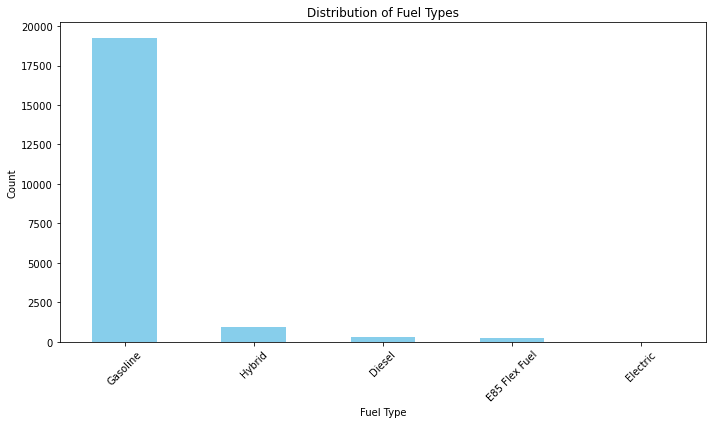

In [756]:
dataset = dataset[~dataset['fuel_type'].isin(['Compressed Natural Gas', 'Unknown','flex_fuel'])]

labels = ['Gasoline', 'Hybrid', 'Diesel', 'E85 Flex Fuel', 'Electric']

# Categorize the 'fuel_type' column using predefined labels
dataset['fuel_category'] = pd.Categorical(dataset['fuel_type'], categories=labels)

# Count the occurrences of each category
category_counts = dataset['fuel_category'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Drop the old 'fuel_type' column
dataset.drop(columns=['fuel_type'], inplace=True)


In [757]:
print(dataset.dtypes)

brand                            object
model                            object
year                              int64
mileage                           int64
automatic_transmission             bool
damaged                            bool
first_owner                        bool
personal_using                     bool
turbo                              bool
alloy_wheels                       bool
adaptive_cruise_control            bool
navigation_system                  bool
power_liftgate                     bool
backup_camera                      bool
keyless_start                      bool
remote_start                       bool
sunroof/moonroof                   bool
automatic_emergency_braking        bool
stability_control                  bool
leather_seats                      bool
memory_seat                        bool
apple_car_play/android_auto        bool
bluetooth                          bool
usb_port                           bool
heated_seats                       bool


# Transformimi

In [758]:
# Normalizimi i atributeve me vlera numerika
#numerical_data = dataset[['year', 'mileage']]

##min_max_scaler = MinMaxScaler()
#scaled_data_minmax = min_max_scaler.fit_transform(numerical_data)
#scaled_data_minmax_df = pd.DataFrame(scaled_data_minmax, columns=numerical_data.columns)
#print(scaled_data_minmax_df.head())



# Detektimi i outliers

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


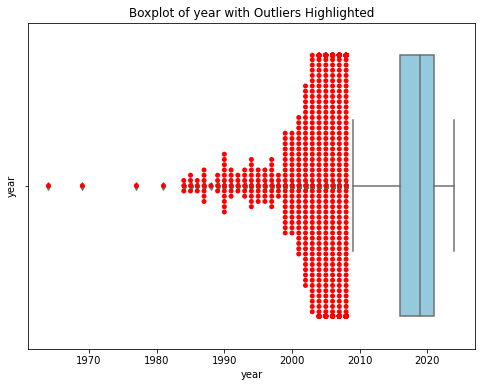

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


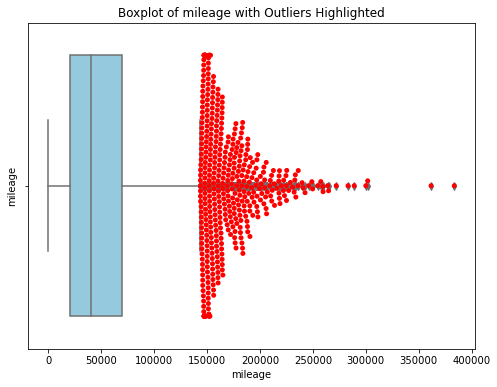

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 64.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


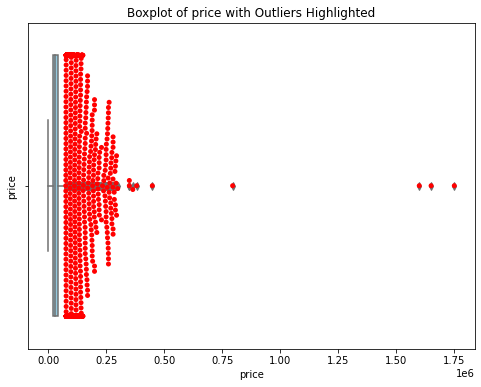

Count of outliers for each numeric feature:
year: 819
mileage: 446
price: 1086


In [759]:
# Calculate and count outliers for each numerical feature
outliers_count_per_feature = {}

# Iterate through each numerical column
for column_name in dataset.select_dtypes(include=['number']):
    # Calculate the IQR for the current column
    Q1 = dataset[column_name].quantile(0.25)
    Q3 = dataset[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers for the current column
    outliers = dataset[(dataset[column_name] < lower_bound) | (dataset[column_name] > upper_bound)]
    
    # Count the number of outliers for the current column
    outliers_count_per_feature[column_name] = len(outliers)

     # Visualize boxplot with outliers highlighted
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dataset[column_name], orient="v", fliersize=5, color="skyblue", linewidth=1.5)
    plt.title(f'Boxplot of {column_name} with Outliers Highlighted')
    plt.ylabel(column_name)
    
    # Highlight outliers
    sns.swarmplot(x=outliers[column_name], color="red", size=5)
    
    plt.show()

# Print the count of outliers for each numeric feature
print("Count of outliers for each numeric feature:")
for column_name, count in outliers_count_per_feature.items():
    print(f"{column_name}: {count}")




# Largimi i outliers

In [760]:
# Remove outliers from the dataset
outliers_removed_dataset = dataset.copy()  # Create a copy of the original dataset

# Iterate through each numerical column
for column_name in dataset.select_dtypes(include=['number']):
    # Calculate the IQR for the current column
    Q1 = dataset[column_name].quantile(0.25)
    Q3 = dataset[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers for the current column
    outliers_removed_dataset = outliers_removed_dataset[(outliers_removed_dataset[column_name] >= lower_bound) & 
                                                        (outliers_removed_dataset[column_name] <= upper_bound)]

# Print the shape of the dataset before and after removing outliers
print("Shape of dataset before removing outliers:", dataset.shape)
print("Shape of dataset after removing outliers:", outliers_removed_dataset.shape)


Shape of dataset before removing outliers: (20774, 31)
Shape of dataset after removing outliers: (18571, 31)


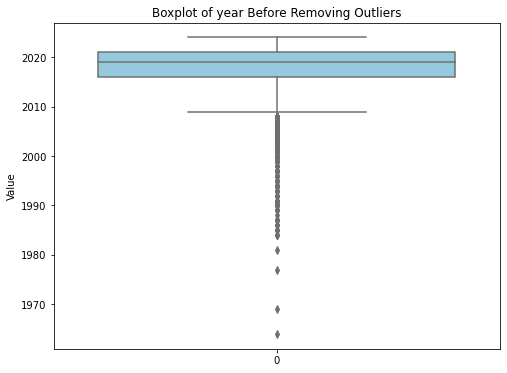

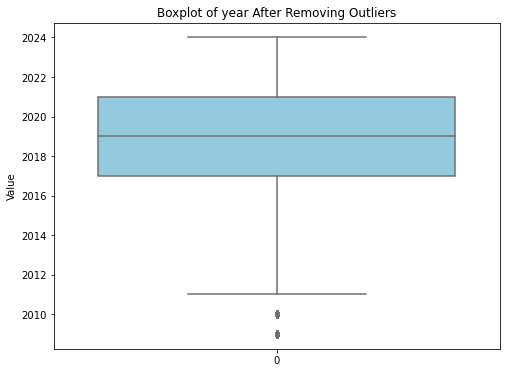

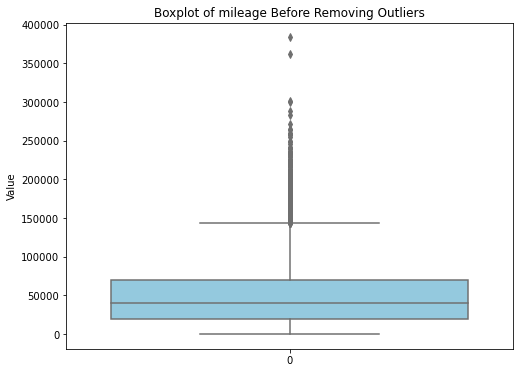

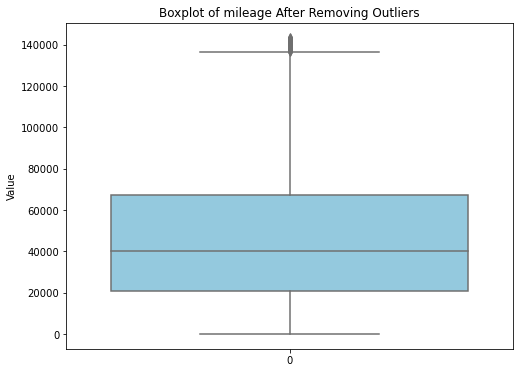

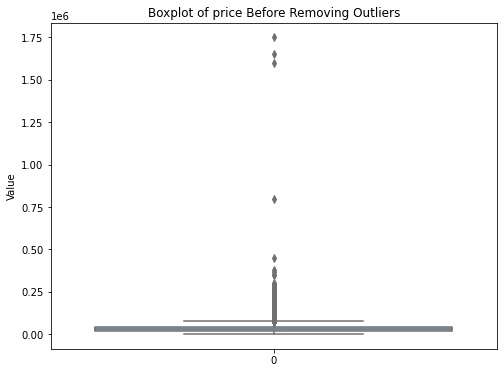

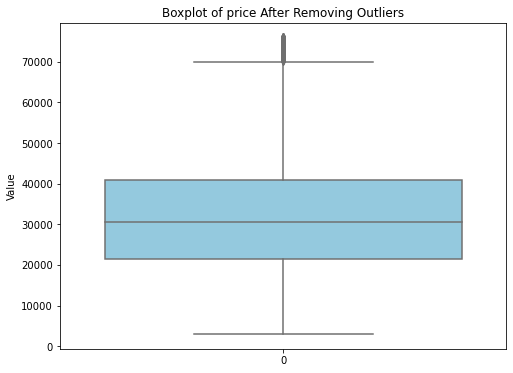

In [761]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate over each numeric attribute
for column_name in dataset.select_dtypes(include='number'):
    # Create a figure for the box plot before removing outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=dataset[column_name], orient="v", fliersize=5, color="skyblue", linewidth=1.5)
    plt.title(f'Boxplot of {column_name} Before Removing Outliers')
    plt.ylabel('Value')
    plt.show()
    
    # Create a figure for the box plot after removing outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=outliers_removed_dataset[column_name], orient="v", fliersize=5, color="skyblue", linewidth=1.5)
    plt.title(f'Boxplot of {column_name} After Removing Outliers')
    plt.ylabel('Value')
    plt.show()


# Ndarja e të dhënave në grupe trajnimi dhe testimi:

In [762]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame

# Encode categorical variables
label_encoder = LabelEncoder()
dataset['interior_color'] = label_encoder.fit_transform(dataset['interior_color'])
dataset['exterior_color'] = label_encoder.fit_transform(dataset['exterior_color'])
dataset['brand'] = label_encoder.fit_transform(dataset['brand'])
dataset['model'] = label_encoder.fit_transform(dataset['model'])

# Select features and target variable
X = dataset.drop('first_owner', axis=1)  # Features
y = dataset['first_owner']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 
# Number of rows in the original dataset
total_rows = len(dataset)

# Number of rows for training
rows_training = len(X_train)

# Number of rows for testing
rows_testing = len(X_test)

print("Total rows:", total_rows)
print("Rows for training:", rows_training)
print("Rows for testing:", rows_testing)


Total rows: 20774
Rows for training: 16619
Rows for testing: 4155
